<a href="https://colab.research.google.com/github/suajeong52/heaveMPM/blob/main/0502_mpm_6%EA%B3%BC_2_85mesh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import pandas as pd

# dp1 ~ dp14 csv 파일과 draftdata2 csv 파일을 불러오기
for i in range(1, 15):
    globals()[f'dp{i}'] = pd.read_csv(f'dp{i}.csv',skiprows=3)
    
draftdata2 = pd.read_csv('aqwa_draft.csv')

# m1 ~ m14 추출
for i in range(1, 15):
    globals()[f'm{i}'] = globals()[f'dp{i}'].iloc[:, 1:]

# Draftdata2 추출
Draftdata2 = draftdata2.iloc[:, 1]

# M1 ~ M14 생성
for i in range(1, 15):
    globals()[f'M{i}'] = globals()[f'm{i}'].iloc[:, :] + Draftdata2.iloc[i-1]


In [10]:
M1

,Line A (m)
0,5.737011e-11
1,-2.098078e-05
2,-9.107584e-05
3,-2.193450e-04
4,-4.158019e-04
...,...
4996,2.138329e-02
4997,2.108479e-02
4998,2.086020e-02
4999,2.070570e-02


In [11]:
M2

,Line A (m)
0,3.918501e-10
1,-2.098044e-05
2,-8.964499e-05
3,-2.164837e-04
4,-4.110332e-04
...,...
4996,2.321959e-02
4997,2.406931e-02
4998,2.498674e-02
4999,2.596569e-02


In [12]:
M7

,Line A (m)
0,-3.510694e-10
1,-2.193486e-05
2,-9.441411e-05
3,-2.279285e-04
4,-4.320148e-04
...,...
4996,3.083706e-03
4997,3.996849e-03
4998,5.002498e-03
4999,6.098747e-03


In [13]:
M14

,-7.749382973
0,-0.000137
1,-0.000261
2,-0.000433
3,-0.000660
4,-0.000944
...,...
4993,0.012465
4994,0.012690
4995,0.012934
4996,0.013188


In [14]:
import numpy as np

In [15]:
for i in range(1, 15):
    locals()[f'M{i}'] = abs(locals()[f'M{i}'])


In [16]:

from scipy.signal import find_peaks
import matplotlib.pyplot as plt


In [17]:
M1

,Line A (m)
0,5.737011e-11
1,2.098078e-05
2,9.107584e-05
3,2.193450e-04
4,4.158019e-04
...,...
4996,2.138329e-02
4997,2.108479e-02
4998,2.086020e-02
4999,2.070570e-02


MAX1: [0.04551697 0.02629948 0.04241467 0.02656603 0.04138708 0.04771805
 0.03941679 0.04019594 0.01659441 0.04847574 0.03043461 0.02110004
 0.04465532 0.00989437 0.03275919 0.03466749 0.01605129 0.05490828
 0.01712179 0.03919458 0.04177809 0.01692438 0.0411706  0.03976727
 0.02101946 0.04682446 0.01336193 0.04228401 0.04002047 0.03151512
 0.06202221 0.02014256 0.03778839 0.03284359 0.03775787 0.05452251
 0.01043272 0.03835869 0.02635384 0.03701496 0.04094172 0.03726244
 0.03708696 0.00712299 0.00213671 0.04621983 0.01930571 0.03554296
 0.02819204 0.03205681 0.03152037 0.04871464 0.00222063 0.00916147
 0.04777479 0.03329897 0.02780151 0.03847742 0.01990747 0.04198122
 0.00274992 0.03795815 0.04892921 0.00169611 0.00685596 0.04476309
 0.0296526  0.04207945 0.01231527 0.04701614 0.03471613 0.02475691
 0.04685736 0.0091548  0.03420925 0.03011465 0.02016163 0.05820513
 0.03006697 0.03986931 0.02485943 0.02859879 0.03745174 0.03717279
 0.03783607 0.04092073]
Top 20 MAX values for M1: [0.041

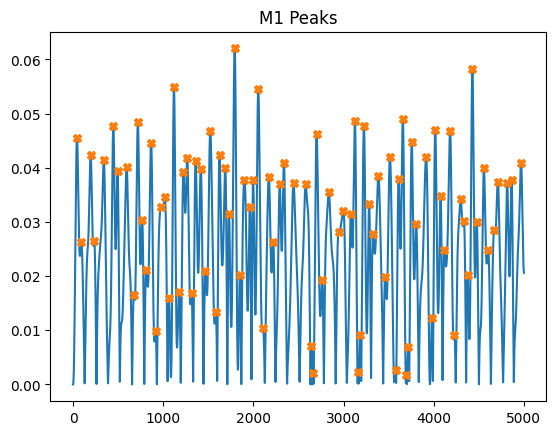

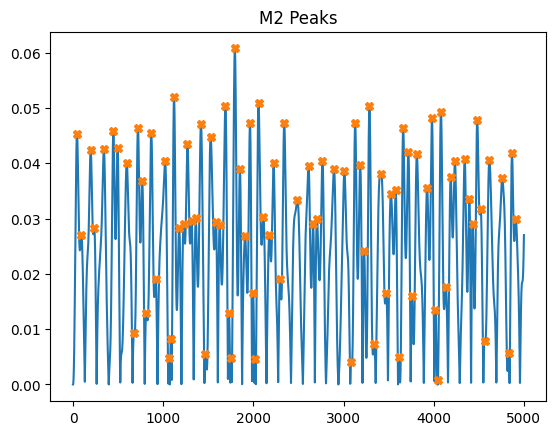

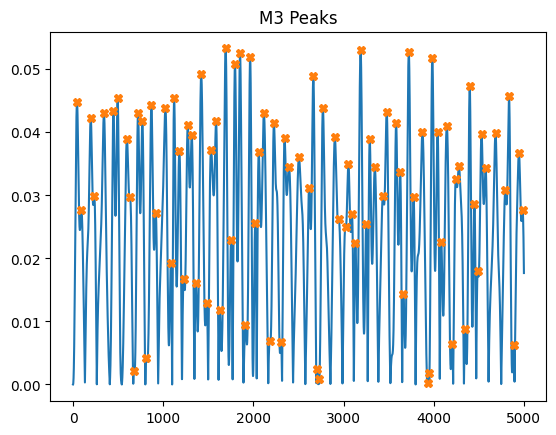

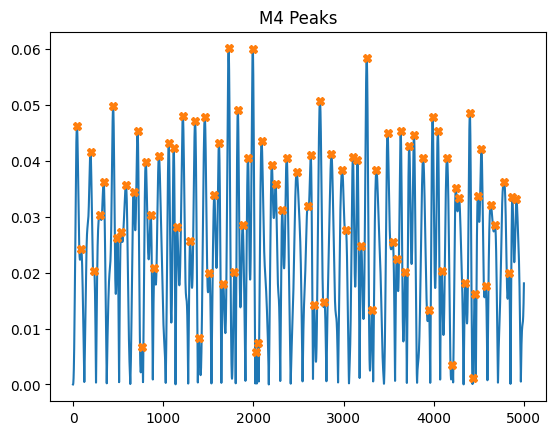

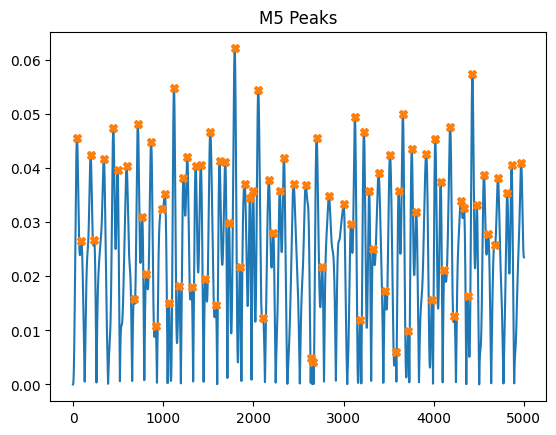

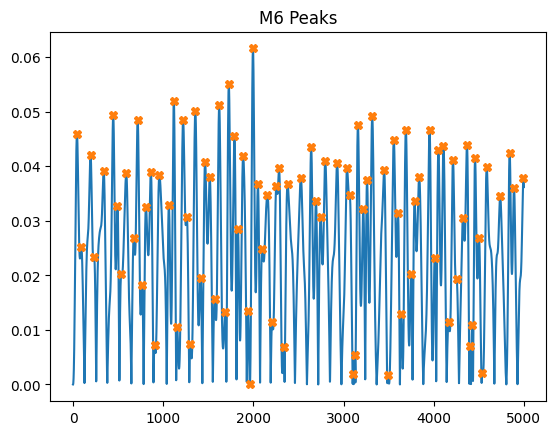

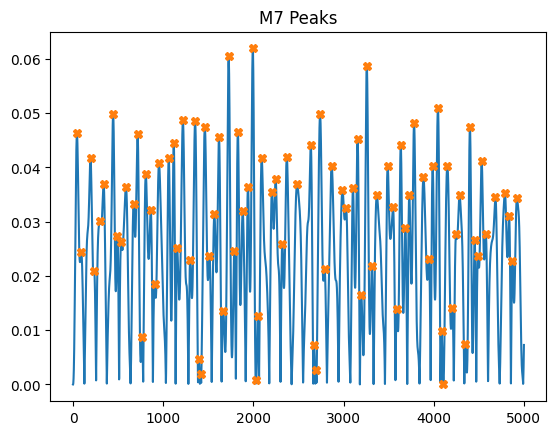

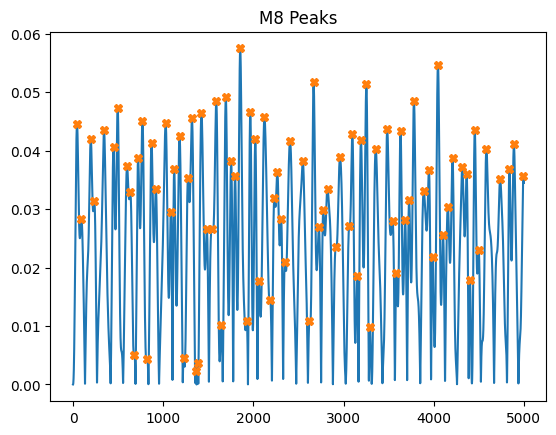

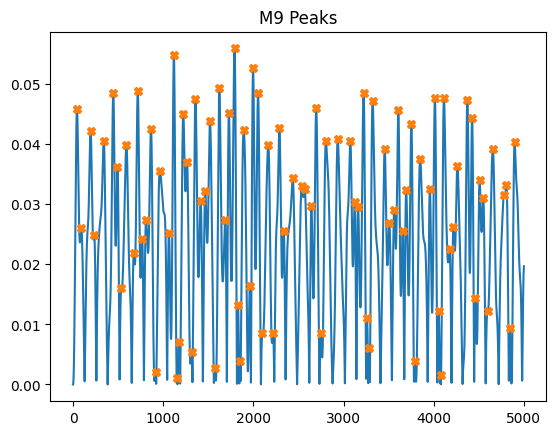

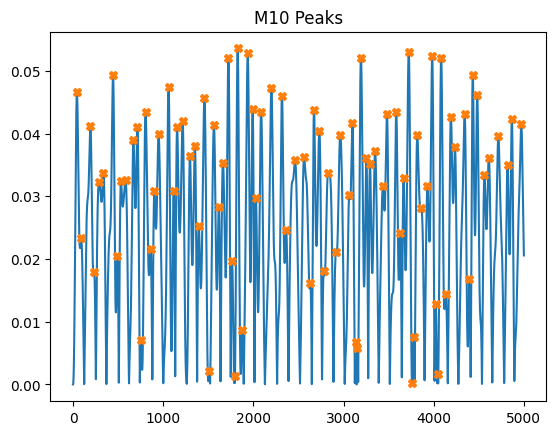

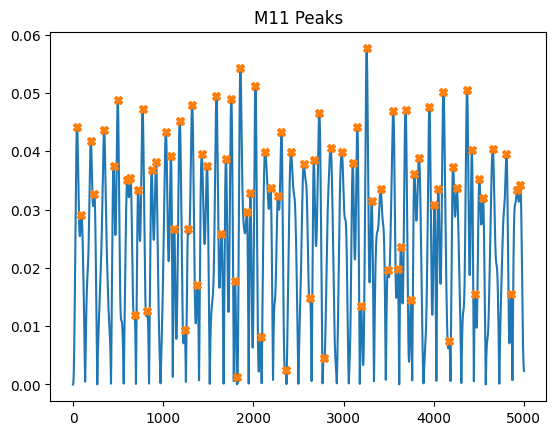

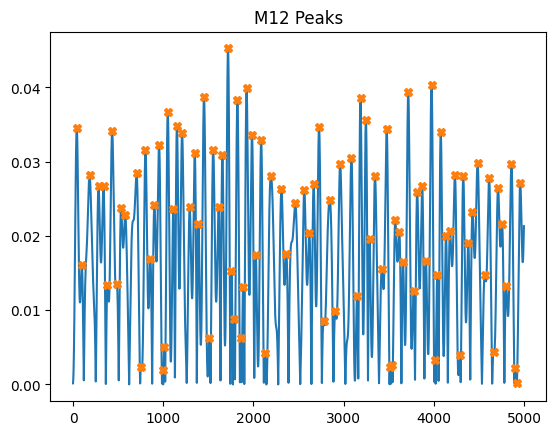

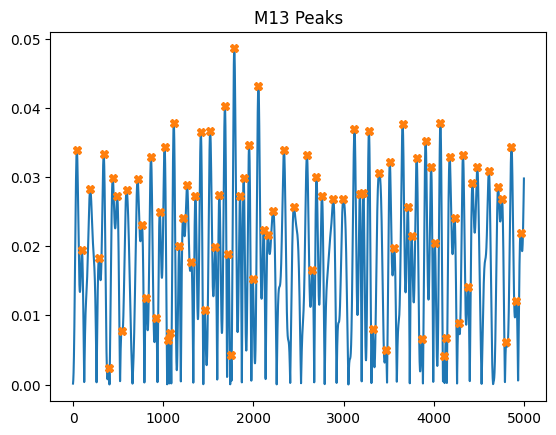

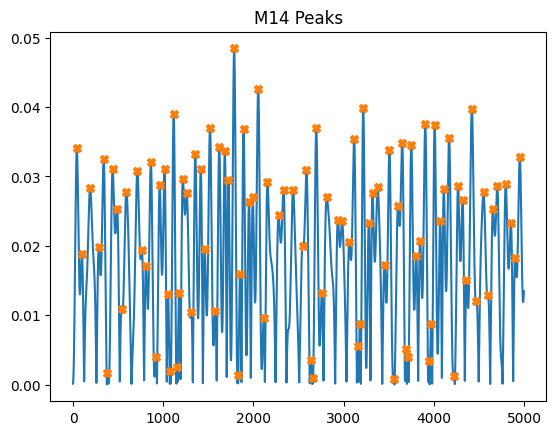

In [18]:
mpm_list = []
for i in range(1, 15):
    # find peaks
    peaks_i, properties_i = find_peaks(locals()[f'M{i}'].iloc[:, 0], height=0)

    # plot peaks
    plt.figure()
    plt.plot(locals()[f'M{i}'])
    plt.plot(peaks_i, locals()[f'M{i}'].iloc[:, 0][peaks_i], "X")
    plt.title(f'M{i} Peaks')

    # calculate MPM
    MAX_i = properties_i["peak_heights"]
    print(f'MAX{i}: {MAX_i}')

    sorted_index_array = np.argsort(MAX_i)
    sorted_array = MAX_i[sorted_index_array]

    n=20
    MAX_r_i = sorted_array[-n:]

    print(f'Top {n} MAX values for M{i}: {MAX_r_i}')

    t2 = 6.5
    p = 0.37
    sigma_i = np.std(MAX_r_i)
    mean_i = np.mean(MAX_r_i)
    gamma = 0.577
    beta_i = (np.sqrt(6) / np.pi) * sigma_i
    mu_i = mean_i - ((np.sqrt(6) / np.pi) * sigma_i * gamma)
    l = -np.log(p)
    MPM_i = -np.log(l) * beta_i + mu_i
    mpm_list.append(MPM_i)
    print(f'MPM{i}: {MPM_i}')


In [19]:
print(mpm_list)

[0.045732345039333606, 0.04624219585854448, 0.04605975944913756, 0.04620870364476729, 0.04559317875553855, 0.04597297474972887, 0.04645123523276909, 0.045502421275488696, 0.046605026551503226, 0.04655506306470403, 0.04631349872066446, 0.034701543517033084, 0.0348660902687297, 0.03525097368216867]


In [20]:
import pandas as pd

In [21]:
dftrain = pd.DataFrame(mpm_list)
dftrain.to_excel('mpm.xlsx', sheet_name='xtrain_sheet')